## Question 1: Write a function that takes two user-defined parameters and returns two different random numbers. These two parameters should specify the minimum and maximum values of the random number.
    
#### Pseudocode version 1:
Input two user-defined parameters, a maximum and a minimum
Generate two random numbers between the maximum and minimum
    
#### Pseudocode verson 2:
<br>Print prompt to notify user to input a maxium and minimum number
<br>Save these values in min and max variables
<br>Create a function that takes in a max and min and outputs two different, random numbers:
    <br> Using numpy random: generate two random numbers and multiply by the max
    <br> Start a while loop and stay in the while loop if either of the numbers is less than min or they equal each other
    <br>return the two values once we break out of the while loop

## Question: How can you protect against two identical random numbers being returned
## Answer: 
The while loop conditional statement will make sure to regenerate a new random number if random number 1 equals random number 2. 

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
import random as rng2

# Iterates until user inputs max bigger than min
while (True):
    max = input("Max random number: ") 
    min = input("Min random number: ")
    max=float(max)
    min=float(min)
   
    if max<min:
        print('Max was bigger than min. Try again.')
    else:
        break

# Function takes a max and min and outputs two non-identical random numbers within said interval
def randomnumber ( max, min ):
    rn1=rng.random(1)*max
    rn2=rng.random(1)*max
    while (rn1)<min or (rn2)<min or rn1==rn2 :
        rn1=rng.random(1)*max
        rn2=rng.random(1)*max
    return (rn1, rn2)

print(randomnumber(max,min))

Max random number:  1000
Min random number:  2


(array([61.14363406]), array([608.09730998]))


## Question 2

Pseudocode:
    <br> Generate a 1000 random numbers from numpy.rand
    <br> Calculate Chi-Squared for this distribution
    <br> Save this value in a chi-squared array
    <br> Iterate a hundred times so we have a hundred values in our chi-squared array
    <br> Plot histogram of chi-squared values

<Figure size 432x288 with 0 Axes>

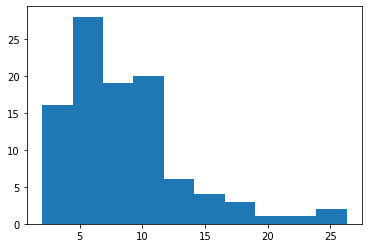

Mean of chi squared distribution 8.55957845395533


In [201]:
#Function that calculates chisquared 
def my_uniform_chisq(bin_values, bin_expectations):
    num_bins = len(bin_values)
    chi_square = sum( ( ((bin_values[i] - bin_expectations[i])**2) / bin_values[i] ) for i in range(num_bins))
    return(chi_square)

chisqarr=[]

#Generates a hundred sample sets of 1000 values
for i in range(100):
    samples  = 1000                                         # Number of samples of the RNG
    num_bins = 10                                              # Number of bins in the histogram (effectively specifies the interval)
    data     = rng.random(samples) 
    plt.clf()
    bin_values, bin_edges = np.histogram(data,num_bins)   # Fill the histogram, and save the values of each of the bins

# Fill an array with the expectations for the bin values
    bin_expectations = [samples/num_bins] * num_bins      # This is a trick to initialize an array with a given length (num_bins)
#Add the chisq value for this sample to the chisquared array    
    chisq = my_uniform_chisq(bin_values,bin_expectations)
    chisqarr.append(chisq)
    
plt.figure()
plt.hist(chisqarr,num_bins)
plt.show()

print('Mean of chi squared distribution', np.mean(chisqarr))



When we run the code the mean of the chi squared distribution fluctuates around 10 (although it is pretty consistently under 10, and over 8), which is consistent with what we would expect for 1000 samples. Ideally we would expect 100 samples in each bin for a sample set. If we use the approximate standard deviation of $\sqrt{n}$, then each bin should fluctuate by 10 numbers. Chi-squared is the average of the deviation for each bin. We calculated the average of all the chi-squared values for the 100 samples we looked at and since it is close to 10, we can conclude that the random generator is pretty close to random. The more trials of samples we did the closer it would become to a normal distribution. 

## Question 3

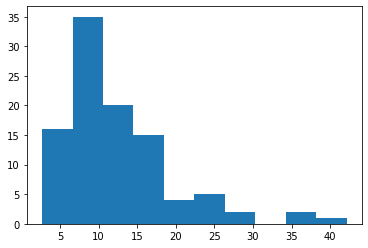

Mean of chi squared distribution 12.34622952297101


In [213]:
#Evaluation of random.random() function

chisqarr=[]
samples  = 100                                         # Number of samples of the RNG
num_bins = 10  


#Generates a hundred sample sets of 1000 values
for i in range(100):
                                                # Number of bins in the histogram (effectively specifies the interval)
    data = []
    for j in range(samples):
        data.append(rng2.random()) 
    bin_values, bin_edges = np.histogram(data,num_bins)   # Fill the histogram, and save the values of each of the bins
    
# Fill an array with the expectations for the bin values
    bin_expectations = [samples/num_bins] * num_bins           # This is a trick to initialize an array with a given length (num_bins)
#Add the chisq value for this sample to the chisquared array
    chisq = my_uniform_chisq(bin_values,bin_expectations)
    chisqarr.append(chisq)


plt.figure()
plt.hist(chisqarr,num_bins)
plt.show()


print('Mean of chi squared distribution', np.mean(chisqarr))

Like I explained in the question above, we see the mean fluctuates around 10. Although for this random generator the mean of the chi-squared distribution is even closer to 10, with some fluctuation. It is pretty consistently above 10. 

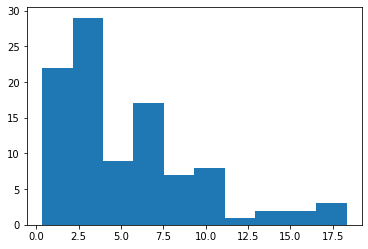

Mean of chi squared distribution 5.414527841415509


In [225]:
#Evaluation of self-written random() function that uses the time from the computer
import time as t


#self-written random() function with computer time
def random ():
    comptime=t.time()
    rand=(comptime%.0001)*10000
    return float(rand)
    
chisqarr=[]
samples  = 1000                                         # Number of samples of the RNG
num_bins = 10  
   
#Generates a hundred sample sets of 1000 values
for i in range(100):
                                                # Number of bins in the histogram (effectively specifies the interval)
    data = []
    for j in range(samples):
        data.append(random()) 

    bin_values, bin_edges = np.histogram(data,num_bins)   # Fill the histogram, and save the values of each of the bins
    
# Fill an array with the expectations for the bin values
    bin_expectations = [samples/num_bins] * num_bins           # This is a trick to initialize an array with a given length (num_bins)

    #add the chisq value for the set to the chisquared array
    chisq = my_uniform_chisq(bin_values,bin_expectations)
    chisqarr.append(chisq)

plt.figure()
plt.hist(chisqarr,num_bins)
plt.show()


print('Mean of chi squared distribution', np.mean(chisqarr))

For my random number generator we see the mean of the chi-squared distribution fluctuates between 3 and 5 pretty consistently. Since we would expect a fluctuation of about 10, this seems pretty far off. Since we are using the time on the computer it makes sense that the numbers would be more correlated despite my attempts to mitigate this. 

## Question 4

### 2D plot

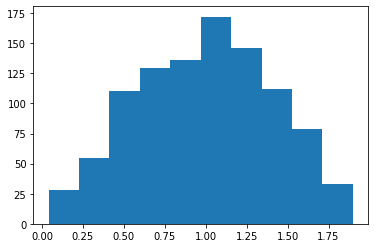

In [137]:
# Specify the number of samples to test
num_samples = 1000

# The C++ way
randomsum = []                             # This is an empty array meant to hold the sequence of sums that we generate
for i in range(num_samples):               # This is our `for` loop, which aside frome some basic syntax, looks just like C++
    total = rng2.random() + rng2.random()    # Here is where we generate a sum of two random numbers
    randomsum.append(total)                # Now we have to put this sum into our array for later plotting

# We've now finished the `for` loop, so we can start plotting
num_bins = 10                             # This specifies the number of bins that we want in our histogram
plt.hist(randomsum, num_bins)              # This builds the histogram with the values stored in `randomsum` and 
plt.show() 

The sum of two random numbers gives us an approximately normal distribution around 1. This makes sense since the average of the sum of two random numbers from 0 to 1 should be around 1. 

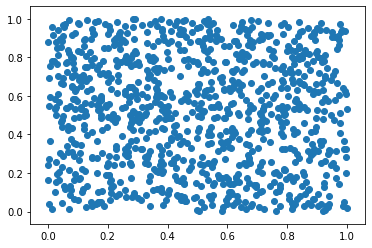

In [194]:
rand1=[]
rand2=[]

for i in range(num_samples):
    rand1.append(rng2.random())
    rand2.append(rng2.random())
    
plt.scatter(rand1, rand2)
    

The two random numbers appear more or less uniformly randomly distributed in the above scatter plot. This further supports the lack of correlation between them. 

### 3D plot

[0.000000e+00 1.000001e-06 2.000002e-06 ... 9.999980e-01 9.999990e-01
 1.000000e+00]


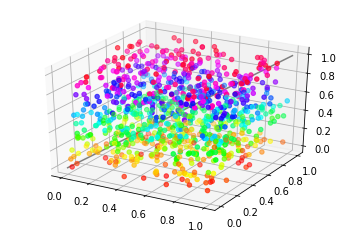

In [232]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 1, 1000000)
x_line = np.linspace(0, 1, 1000000)
y_line = np.linspace(0, 1, 1000000)#

ax.plot3D(x_line, y_line, z_line, 'gray')

z_points=[]
x_points=[]
y_points=[]

for i in range(num_samples):               
    z_points.append(rng2.random()) 
    x_points.append(rng2.random()) 
    y_points.append(rng2.random()) 

ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

The scatter plot appears decently uniformly distributed as best as I can tell with the 3D plot.

## Question 5

In [240]:
import math

#Function that generates two random numbers from an exponential distribution
def exprandomnumber ( min, max, lda=1 ):
    #generate two random numbers from uniform distribution
    rn1=rng.random(1)
    rn2=rng.random(1)
    #iterate until random numbers are different and within specified (min,max) range
    while (rn1*max)<min or (rn2*max)<min or rn1==rn2 :
        rn1=rng.random(1)
        rn2=rng.random(1)
    
    rn1=-math.log(1-rn1)/lda #This is the inverse of the CDF of the exponential distribution that allows us 
                                #to take a random number from the uniform distribution and give a random number from an exponential distribution
    rn2=-math.log(1-rn2)/lda
    
    return (rn1, rn2)

x,y=exprandomnumber(5,10)

print(x,y)



3.099801637155863 2.5740045413346455


### Question 6

$$ P(t_1 , t_2) = \int_{t_1}^{t_2} \lambda e^{- \lambda t}dt $$ 

$$ P(t_1 , t_2) = [\lambda\frac{-1}{\lambda}e^{-\lambda t}]_{t_1}^{t2}$$

$$ P(t_1 , t_2) = -e^{-t2} + e^{-t1} $$

This gives the probability that a random number from the exponential distribution will be within the time interval from t1 to t2. Each random number generating event should be independent. Therefore the probability that two generated random numbers are within a time interval t1 to t2 should be: 


$$ P_1(t1, t2) * P_2(t1, t2)$$

In [248]:
t1=0
t2=0.1
p1=-math.exp(-t2)+math.exp(-t1)
p2=-math.exp(-t2)+math.exp(-t1)
p=p1*p2
print(p, 'is the probability that two random numbers from an exponential distribution are within time 0 and time 0.1')

0.009055917006062723 is the probability that two random numbers from an exponential distribution are within time 0 and time 0.1
